In [22]:
import context
from utils.datasets import Cifar10Dataset
from torch.utils.data import DataLoader
from models.diffusion import DiffusionModel, ForwardDiffusion
from models.unet import UNet
import torch
from models.positional_encoding import PositionalEncoding
import matplotlib.pyplot as plt
from torch.fft import fftn, fftshift
import plotly.graph_objs as go
import plotly.io as pio

timesteps = 100

pos_encoder = PositionalEncoding(128, dropout=0)

ts = torch.range(0, timesteps, dtype=torch.int64)
pos_encoding = pos_encoder.get_pos_encoding(ts)

/var/folders/h9/96x2b9pn2_v_xfb0gsxn97mw0000gn/T/ipykernel_54775/558668595.py:17: UserWarning:

torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).



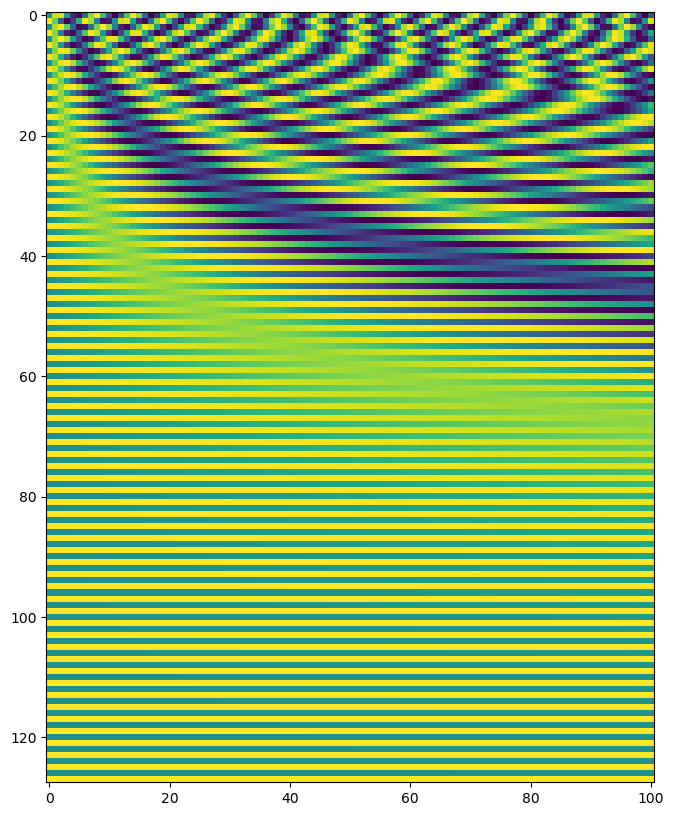

In [23]:
plt.figure(figsize=(20,10))
plt.imshow(pos_encoding.permute(1,0))

In [24]:
pos_enc_freq = fftn(pos_encoding, dim=(1))
pos_enc_freq = fftshift(pos_enc_freq, dim=(1))

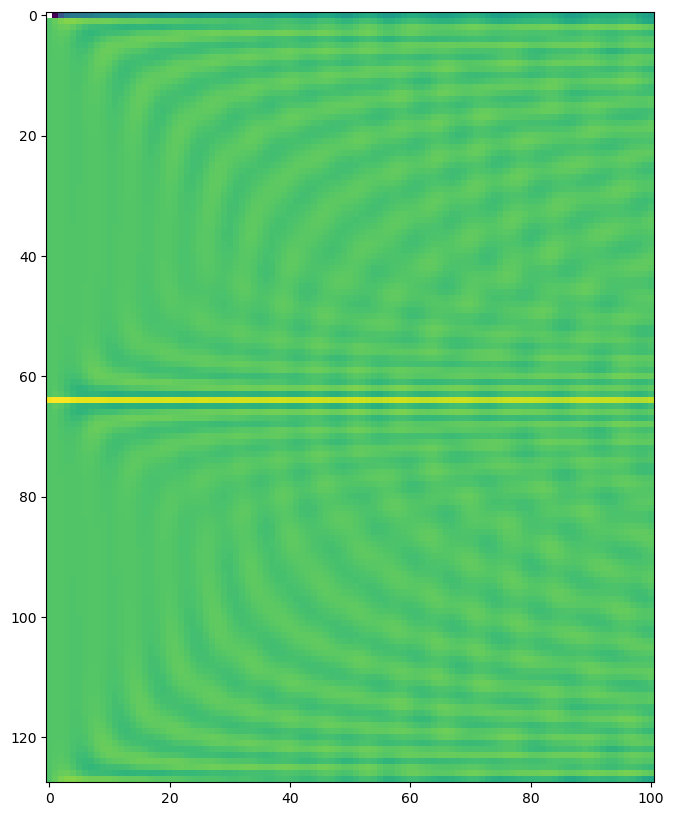

In [25]:
plt.figure(figsize=(20,10))
log_freq = torch.log10(torch.real(pos_enc_freq).permute(1,0) - torch.min(torch.real(pos_enc_freq)))
plt.imshow(log_freq)

In [26]:
fig = go.Figure(data=[go.Surface(z=log_freq)])
fig.update_layout(title='Spectrum of Positional Encoding',
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()